# Versuch 241: Wechselstromeigenschaften von RLC-Gliedern

## Auswertung der Messergebnisse 

In [1]:
#Benötigte Pakete
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-white')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize']=2

### Teil 1: Bestimmung der Zeitkonstante eines RC-Glieds

In [2]:
#Bestimmung der Halbwertszeit bei der Spannungsmessung

#erste Messreihe
C1=470e-9 #Farad
C1_err=0.1*C1 

R1=1e3 #Ohm
R1_err=0.05*R1

#es wurde zur Erhöhung der Genauigkeit die Zeit für 3x T_hw gemessen.
T_hw1=0.99e-3/3 #s
T_hw1_err=0.1e-3/3 #s

#zweite Messreihe
C2=4.7e-9 
C2_err=0.1*C2

R2=10e3
R2_err=0.05*R2

T_hw2=96e-6/3
T_hw2_err=10e-6/3

#dritte Messreihe
C3=47e-9
C3_err=0.1*C3

R3=R1
R3_err=R1_err

T_hw3=111e-6/3
T_hw3_err=T_hw2_err

In [3]:
#Halbwertszeit beim Stromverlauf
C4=47e-9
C4_err=0.1*C4

R4=R1
R4_err=R1_err

T_hw4=112e-6/3
T_hw4_err=T_hw2_err

In [4]:
#Theoretische Werte für Tau=R*C

tau_theo1= R1*C1 
#Fehler aus Fehlerfortpflanzung
tau_theo1_err=np.sqrt((C1*R1_err)**2+(R1*C1_err)**2)

tau_theo2= R2*C2 
tau_theo2_err=np.sqrt((C2*R2_err)**2+(R2*C2_err)**2)

tau_theo3= R3*C3 
tau_theo3_err=np.sqrt((C3*R3_err)**2+(R3*C3_err)**2)

print('Für die theoretischen Werte wurde ermittelt:')
print('tau_theo1 = ' + str(tau_theo1) + ' +/- ' + str(tau_theo1_err))
print('tau_theo2 = ' + str(tau_theo2) + ' +/- ' + str(tau_theo2_err))
print('tau_theo3 = ' + str(tau_theo3) + ' +/- ' + str(tau_theo3_err))

Für die theoretischen Werte wurde ermittelt:
tau_theo1 = 0.00047 +/- 5.25475974712e-05
tau_theo2 = 4.7e-05 +/- 5.25475974712e-06
tau_theo3 = 4.7e-05 +/- 5.25475974712e-06


In [5]:
#Experimentelle Werte für Tau=T_hw/ln(2) 

tau_exp1=T_hw1/np.log(2)
#Fehler aus Fehlerfortpflanzung
tau_exp1_err=T_hw1_err/np.log(2)

tau_exp2=T_hw2/np.log(2)
tau_exp2_err=T_hw2_err/np.log(2)

tau_exp3=T_hw3/np.log(2)
tau_exp3_err=T_hw3_err/np.log(2)

print('Für die experimentellen Werte wurde ermittelt:')
print('tau_exp1 = ' + str(tau_exp1) + ' +/- ' + str(tau_exp1_err))
print('tau_exp2 = ' + str(tau_exp2) + ' +/- ' + str(tau_exp2_err))
print('tau_exp3 = ' + str(tau_exp3) + ' +/- ' + str(tau_exp3_err))

Für die experimentellen Werte wurde ermittelt:
tau_exp1 = 0.000476089363493 +/- 4.80898346963e-05
tau_exp2 = 4.61662413084e-05 +/- 4.80898346963e-06
tau_exp3 = 5.33797165129e-05 +/- 4.80898346963e-06


In [6]:
#Vergleich der experimentellen und theoretischen Werte 
diff_tau1=np.abs(tau_theo1-tau_exp1)
diff_tau1_err=np.sqrt((tau_theo1_err)**2+(tau_exp1_err)**2)

diff_tau2=np.abs(tau_theo2-tau_exp2)
diff_tau2_err=np.sqrt((tau_theo2_err)**2+(tau_exp2_err)**2)

diff_tau3=np.abs(tau_theo3-tau_exp3)
diff_tau3_err=np.sqrt((tau_theo3_err)**2+(tau_exp3_err)**2)

print('Der Vergleich der theoretischen und experimentellen Werte liefert:')
print('∆(tau1) = ' + str(diff_tau1) + ' +/- ' + str(diff_tau1_err)+' => Sigma= '+str(diff_tau1/diff_tau1_err))
print('∆(tau2) = ' + str(diff_tau2) + ' +/- ' + str(diff_tau2_err)+' => Sigma= '+str(diff_tau2/diff_tau2_err))
print('∆(tau3) = ' + str(diff_tau3) + ' +/- ' + str(diff_tau3_err)+' => Sigma= '+str(diff_tau3/diff_tau3_err))

Der Vergleich der theoretischen und experimentellen Werte liefert:
∆(tau1) = 6.08936349336e-06 +/- 7.12311884017e-05 => Sigma= 0.0854873213545
∆(tau2) = 8.33758691553e-07 +/- 7.12311884017e-06 => Sigma= 0.117049667465
∆(tau3) = 6.37971651289e-06 +/- 7.12311884017e-06 => Sigma= 0.895635276631


In [7]:
#Zum Vergleich: Werte aus der Strommessung
tau_theo4=R4*C4
tau_theo4_err=np.sqrt((C4*R4_err)**2+(R4*C4_err)**2)

tau_exp4=T_hw4/np.log(2)
tau_exp4_err=T_hw4_err/np.log(2)

print('Aus der Strommessung ergeben sich die folgenden Werte:')
print('tau_theo_I = ' + str(tau_theo4) + ' +/- ' + str(tau_theo4_err))
print('tau_exp_I = ' + str(tau_exp4) + ' +/- ' + str(tau_exp4_err))
print()

diff_tau4=np.abs(tau_theo4-tau_exp4)
diff_tau4_err=np.sqrt((tau_theo4_err)**2+(tau_exp4_err)**2)

print('Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:')
print('∆(tau4) = ' + str(diff_tau4) + ' +/- ' + str(diff_tau4_err)+' => Sigma= '+str(diff_tau4/diff_tau4_err))

Aus der Strommessung ergeben sich die folgenden Werte:
tau_theo_I = 4.7e-05 +/- 5.25475974712e-06
tau_exp_I = 5.38606148599e-05 +/- 4.80898346963e-06

Für die Differenz Theorie-Experiment bei der Strommessung folgt somit:
∆(tau4) = 6.86061485985e-06 +/- 7.12311884017e-06 => Sigma= 0.963147606238


### Teil 2: RC-Glied als Integrator und Differentiator

Dieser Aufgabenteil wird direkt anhand der während des Versuchs erstellten Diagramme diskutiert und im Protokollheft aufgeschrieben.

### Teil 3: Frequenz- und Phasengang eines RC-Glieds

In [8]:
#Bestimmung der Grenzfrequenzen am Circuit Analyzer

#Tiefpass
freq_grenz_tp=3.03*1e3 #Hz
freq_grenz_tp_err=0.15*1e3

#Hochpass
freq_grenz_hp=3.21*1e3
freq_grenz_hp_err=freq_grenz_tp_err

#### Phasengang am Hochpass

In [9]:
#Frequenzen 
freq=1e3*np.array([1,2,3,4,5,6,7,8,9,10])

#Phasenunterschiede ∆t mit Fehler
delta_t=1e-6*np.array([200.0,81.0,44.4,28.4,19.2,14.0,10.7,8.7,6.2,4.9])
delta_t_err=1e-6*np.array([20,10,10,5,5,5,3,3,3,2])

#Phase umgerechnet in Winkel 
phi=360*freq*delta_t
phi_err=phi*np.sqrt((delta_t_err/delta_t)**2)

Der Fit liefert eine Grenzfrequenz von freq_g = 3391.1992184 +/- 56.9768976862


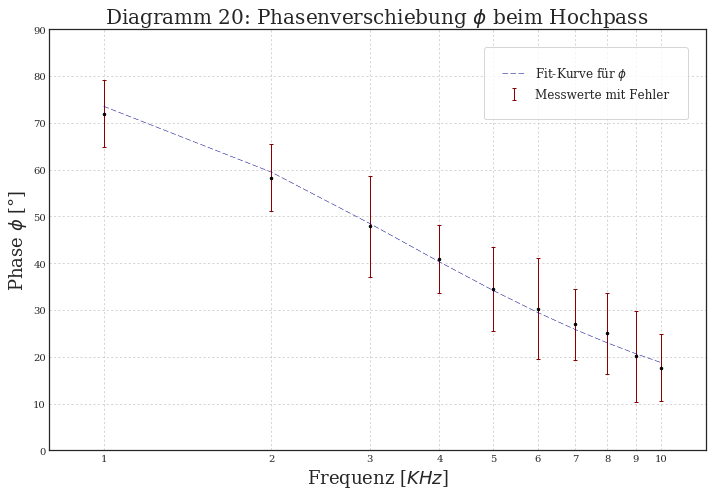

In [29]:
#Fitfunktion
def function(freq,freq_grenz):
    return np.arctan(freq_grenz/freq)*(360/(2*np.pi))

plt.plot(freq, phi, marker='.',markersize=5, color='black',linewidth=1,linestyle=' ')
plt.xscale('log')
plt.errorbar(freq,phi,yerr=phi_err,linewidth=1,linestyle='',color='darkred',label='Messwerte mit Fehler')
plt.xlabel('Frequenz ['+'$KHz$]', size=18)
plt.ylabel('Phase'+ ' '+r'$\phi$' + r' [°]' , size=18)
plt.title(r'Diagramm 20: Phasenverschiebung $\phi$ beim Hochpass ', size=20)
plt.grid(ls='dotted')
plt.xlim(800,12000)
plt.ylim(0,90)
plt.xticks( [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],
            [1,2,3,4,5,6,7,8,9,10])

#Fitten an die Daten
popt,pcov=curve_fit(function,freq,phi,sigma=phi_err)
freq_g=popt[0]
freq_g_err=pcov[0,0]**0.5

print('Der Fit liefert eine Grenzfrequenz von freq_g = '+str(freq_g)+' +/- '+str(freq_g_err))

#Einzeichnen der Fit-Kurve
plt.plot(freq,function(freq,popt[0]),color='darkblue',linewidth=0.5,linestyle='--',label=r'Fit-Kurve für $\phi$')
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5)

#Abspeichern des Bildes im Format "PDF"
plt.tight_layout()
plt.savefig('Diagramme/V241Diagramm20.pdf', format='PDF')

In [11]:
#Vergleich der gemessenen Grenzfrequenz mit dem optimalen Fit-Parameter
print('Aus dem Fit ergibt sich die folgende Grenzfrequenz:')
print('freq_g = ' + str(freq_g) + ' +/- ' + str(freq_g_err))
print()

diff_freq_g=np.abs(freq_g-freq_grenz_hp)
diff_freq_g_err=np.sqrt((freq_g_err)**2+(freq_grenz_hp_err)**2)

print('Für die Differenz Theorie-Experiment folgt somit:')
print('∆(freq_g) = '+str(diff_freq_g)+' +/- '+str(diff_freq_g_err)+' => Sigma= '+str(diff_freq_g/diff_freq_g_err))

Aus dem Fit ergibt sich die folgende Grenzfrequenz:
freq_g = 3391.1992184 +/- 56.9768976862

Für die Differenz Theorie-Experiment folgt somit:
∆(freq_g) = 181.199218396 +/- 160.456744545 => Sigma= 1.12927143643


In [12]:
#Vergleich der gemessen Grenzfrequenzen mit den Theoriewerten
freq_g_theo=1/(2*np.pi*R1*C3)
freq_g_theo_err=freq_g_theo*((R1_err/R1)**2+(C3_err/C3)**2)**0.5

diff_freq_g_hp=np.abs(freq_g_theo-freq_grenz_hp)
diff_freq_g_hp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_hp_err)**2)

diff_freq_g_tp=np.abs(freq_g_theo-freq_grenz_tp)
diff_freq_g_tp_err=np.sqrt((freq_g_theo_err)**2+(freq_grenz_tp_err)**2)

print('Für die Differenz Theorie-Experiment folgt somit für den Hochpass:')
print('∆(freq_g_hp) = '+str(diff_freq_g_hp)+' +/- '+str(diff_freq_g_hp_err)+' => Sigma= '+str(diff_freq_g_hp/diff_freq_g_hp_err))
print()

print('Für die Differenz Theorie-Experiment folgt somit für den Tiefpass:')
print('∆(freq_g_tp) = '+str(diff_freq_g_tp)+' +/- '+str(diff_freq_g_tp_err)+' => Sigma= '+str(diff_freq_g_tp/diff_freq_g_tp_err))

Für die Differenz Theorie-Experiment folgt somit für den Hochpass:
∆(freq_g_hp) = 176.275384934 +/- 407.22937306 => Sigma= 0.432865104031

Für die Differenz Theorie-Experiment folgt somit für den Tiefpass:
∆(freq_g_tp) = 356.275384934 +/- 407.22937306 => Sigma= 0.874876441886


### Teil 4: Frequenzgang eines Serienschwingkreises

#### Bestimmung der Induktivität $L_1$

In [13]:
omega_res=2*np.pi*np.array([3.82e3,3.58e3,3.58e3])
omega_res_err=2*np.pi*np.array([0.1e3,0.05e3,0.05e3])

omega_res_mean=np.mean(omega_res)
omega_res_mean_err=1/3*np.sum(omega_res_err**2)**0.5
omega_res_mean_std=np.std(omega_res)/np.sqrt(len(omega_res))

print('Die Grenzfrequenz wurde bestimmt auf:')
print(str(omega_res_mean) + ' +/- ' + str(omega_res_mean_err) + ' +/- ' + str(omega_res_mean_std) + ' s^-1')

Die Grenzfrequenz wurde bestimmt auf:
22996.4582243 +/- 256.509966032 +/- 410.415945652 s^-1


In [14]:
#Wir wissen omega_res=sqrt(1/(L*C)). Daraus folgt:

L1=1/(omega_res_mean**2*C3)
L1_err=L1*np.sqrt((2*omega_res_mean_err/omega_res_mean)**2+(C3_err/C3)**2)
L1_std=L1*np.sqrt((2*omega_res_mean_std/omega_res_mean)**2)

print('Aus der ermittelten Grenzfrequenz folgt für die Induktivität:')
print('L1 = ' + str(L1) + ' +/- ' + str(L1_err) + ' +/- ' + str(L1_std) + ' H')

Aus der ermittelten Grenzfrequenz folgt für die Induktivität:
L1 = 0.040232797798 +/- 0.0041221786899 +/- 0.0014360630314 H


#### Bestimmung des Verlustwiederstandes $R_V$

In [15]:
#Aus Anleitung: ∆omega=(R+Rv)/L1

delta_omega=2*np.pi*np.array([4.98e3,1.34e3,0.75e3])
delta_omega_err=2*np.pi*np.array([0.10e3,0.05e3,0.05e3])
R=np.array([1000,220,47])
R_err=0.05*R

R_v=delta_omega*L1-R
R_v_err=np.sqrt((delta_omega_err*L1)**2+(delta_omega*L1_err)**2+(R_err)**2)

R_ges=R+R_v
R_ges_err=np.sqrt(R_err**2+R_v_err**2)

print('Der Verlustwiderstand des jew. Schwingkreises beträgt')
print('Rv = ' + str(R_v) + ' Ohm')
print(' +/- ' + str(R_v_err) + ' Ohm')
print()
print('Daraus folgt für den jew. Gesamtwiderstand R + Rv:')
print('R + Rv = ' + str(R_ges) + ' Ohm')
print(' +/-     ' + str(R_ges_err) + ' Ohm')

Der Verlustwiderstand des jew. Schwingkreises beträgt
Rv = [ 258.89481748  118.73876615  142.59259299] Ohm
 +/- [ 140.62686379   38.53961505   23.29425387] Ohm

Daraus folgt für den jew. Gesamtwiderstand R + Rv:
R + Rv = [ 1258.89481748   338.73876615   189.59259299] Ohm
 +/-     [ 149.25118029   40.07869669   23.41249161] Ohm


#### Zusatzaufgabe für Physiker: Verlustwiderstand aus Spannungsmessung

In [16]:
#Aus Anleitung: U_A = R/(R+Rv)*U_E

U_E=0.98*np.ones(3)
U_E_err=0.02*np.ones(3)

U_A=np.array([0.64,0.49,0.19])
U_A_err=0.03*np.ones(3)

R_v2=R*(U_E/U_A-1)
R_v2_err=np.sqrt((R_err*(U_E/U_A-1))**2+(R*U_E_err/U_A)**2+(R*U_E*U_A_err/U_A**2)**2)

R_ges2=R+R_v2
R_ges2_err=np.sqrt(R_err**2+R_v2_err**2)

print('Aus der Spannungsmessung folgt für den jew. Verlustwiderstand: ')
print('Rv = ' + str(R_v2) + ' Ohm')
print(' +/- ' + str(R_v2_err) + ' Ohm')
print()
print('Für den Gesamtwiderstand folgt somit:')
print('R + Rv = ' + str(R_ges2) + ' Ohm')
print(' +/-     ' + str(R_ges2_err) + ' Ohm')

Aus der Spannungsmessung folgt für den jew. Verlustwiderstand: 
Rv = [ 531.25        220.          195.42105263] Ohm
 +/- [ 82.66871223  30.45210494  39.81305425] Ohm

Für den Gesamtwiderstand folgt somit:
R + Rv = [ 1531.25         440.           242.42105263] Ohm
 +/-     [ 96.61322881  32.37793532  39.88234934] Ohm


### Teil 5: Bestimmung der Dämpfungskonstanten eines freien, gedämpften Schwingkreises

#### Bestimmung der Induktivität der Spule

In [17]:
#Resonanzfrequenz aus Aufgabe 4
L1_2=1/(omega_res[2]**2*C3)
L1_2_err=L1_2*np.sqrt((2*omega_res_err[2]/omega_res[2])**2+(C3_err/C3)**2)

print('Aus der in Aufgabenteil 4 ermittelten Resonanzfrequenz folgt:')
print('L1 = ' + str(L1_2) + ' +/- ' + str(L1_2_err) + ' H')

Aus der in Aufgabenteil 4 ermittelten Resonanzfrequenz folgt:
L1 = 0.0420510023238 +/- 0.00436607080512 H


#### Logarithmisches Dekrement

In [18]:
A=np.array([3.75,2.25,1.36,0.80,0.47]) #Volt
A_err=0.10*np.ones(5)

Lambda=[]
Lambda_err=[]
for i in range(4):
    Lambda.append(np.log(A[i]/A[i+1]))
    Lambda_err.append(np.sqrt((A_err[0]/A[i])**2+(A_err[0]/A[i+1])**2))

Lambda_err=np.array(Lambda_err)
Lambda_mean=np.mean(Lambda)
Lambda_mean_err=1/3*np.sum(Lambda_err**2)**0.5
Lambda_mean_std=np.std(Lambda)/np.sqrt(len(Lambda))
print('Das logarithmische Dekrement berechnet sich zu:')
print('Lambda = ' + str(Lambda_mean) + ' +/- ' + str(Lambda_mean_err) + ' +/- ' + str(Lambda_mean_std))

Das logarithmische Dekrement berechnet sich zu:
Lambda = 0.519194606065 +/- 0.101101835258 +/- 0.00617300884657


#### Gesamtwiderstand

In [19]:
#nach Anleitung Lambda=delta*T und delta=R_ges/(2L) also R_ges=2L*Lambda/T
T=1.08e-3/4
T_err=0.05e-3/4
R_ges3=2*L1_2*Lambda_mean/T
R_ges3_err=R_ges3*np.sqrt((L1_2_err/L1_2)**2+(Lambda_mean_err/Lambda_mean)**2+(T_err/T)**2)
R_ges3_std=R_ges3*np.sqrt((Lambda_mean_std/Lambda_mean)**2)

print('Der damit ermittelte Gesamtwiderstand berechnet sich zu:')
print('R_ges = ' + str(R_ges3) + ' +/- ' + str(R_ges3_err) + ' +/- ' + str(R_ges3_std))

Der damit ermittelte Gesamtwiderstand berechnet sich zu:
R_ges = 161.723359897 +/- 36.465900301 +/- 1.92282377298


#### Vergleich mit den Ergebnissen aus Aufgabe 4

In [20]:
diff_R_ges1=np.abs(R_ges[2]-R_ges3)
diff_R_ges1_err=np.sqrt((R_ges_err[2])**2+(R_ges3_err)**2)

diff_R_ges2=np.abs(R_ges2[2]-R_ges3)
diff_R_ges2_err=np.sqrt((R_ges2_err[2])**2+(R_ges3_err)**2)

#Den Vergleich bezüglich des statistischen Fehlers halte ich nicht für sinnvoll, da der stat. Fehler so gering ist.

print('Für die Differenz zu den beiden Werten aus Aufgabe 4 folgt somit:')
print('∆(R_ges1) = '+str(diff_R_ges1)+' +/- '+str(diff_R_ges1_err)+' => Sigma= '+str(diff_R_ges1/diff_R_ges1_err))
print('∆(R_ges2) = '+str(diff_R_ges2)+' +/- '+str(diff_R_ges2_err)+' => Sigma= '+str(diff_R_ges2/diff_R_ges2_err))

Für die Differenz zu den beiden Werten aus Aufgabe 4 folgt somit:
∆(R_ges1) = 27.8692330959 +/- 43.3348202756 => Sigma= 0.643114080517
∆(R_ges2) = 80.6976927342 +/- 54.0403892822 => Sigma= 1.49328481541


### Teil 6: Resonanzüberhöhung

#### Resonanzfrequenzen am Serienschwingkreis

In [21]:
#Theoretischer Wert
omega_res_R_theo=1/np.sqrt(L1*C3)
omega_res_R_theo_err=omega_res_R_theo*np.sqrt((0.5*C3_err/C3)**2+(0.5*L1_err/L1)**2)
omega_res_R_theo_std=omega_res_R_theo*np.sqrt((0.5*L1_std/L1)**2)

print('Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: ')
print('omega_res_R_theo = ' + str(omega_res_R_theo) + ' +/- ' + str(omega_res_R_theo_err) + ' +/- ' + str(omega_res_R_theo_std) + ' s^-1')
print()
omega_res_C_theo=np.sqrt(omega_res_R_theo**2-0.5*(R[1]/L1)**2)
omega_res_C_theo_err=0.5/omega_res_C_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+(R[1]*R_err[1]/L1**2)**2+(R[1]**2*L1_err/L1**3)**2)
omega_res_C_theo_std=0.5/omega_res_C_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_std)**2+(R[1]**2*L1_std/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: ')
print('omega_res_C_theo = ' + str(omega_res_C_theo) + ' +/- ' + str(omega_res_C_theo_err) + ' +/- ' + str(omega_res_C_theo_std) + ' s^-1')
print()

omega_res_L_theo=np.sqrt(omega_res_R_theo**2+0.5*(R[1]/L1)**2)
omega_res_L_theo_err=0.5/omega_res_L_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_err)**2+(R[1]*R_err[1]/L1**2)**2+(R[1]**2*L1_err/L1**3)**2)
omega_res_L_theo_std=0.5/omega_res_L_theo*np.sqrt((2*omega_res_R_theo*omega_res_R_theo_std)**2+(R[1]**2*L1_std/L1**3)**2)

print('Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: ')
print('omega_res_L_theo = ' + str(omega_res_L_theo) + ' +/- ' + str(omega_res_L_theo_err) + ' +/- ' + str(omega_res_L_theo_std) + ' s^-1')

Die theoretische Resonanzfrequenz omega_R ergibt sich aus dem Aufbau zu: 
omega_res_R_theo = 22996.4582243 +/- 1646.20254434 +/- 410.415945652 s^-1

Die theoretische Resonanzfrequenz omega_C ergibt sich aus dem Aufbau zu: 
omega_res_C_theo = 22669.0674512 +/- 1671.66909413 +/- 417.008215096 s^-1

Die theoretische Resonanzfrequenz omega_L ergibt sich aus dem Aufbau zu: 
omega_res_L_theo = 23319.2530459 +/- 1625.05974682 +/- 405.381224566 s^-1


In [22]:
#Resonanzfrequenz aus Abgriff an Widerstand, Kondensator und Spule
omega_res_R=2*np.pi*3.70e3
omega_res_C=2*np.pi*3.60e3
omega_res_L=2*np.pi*3.82e3

omega_res2_err=2*np.pi*0.05e3

#### Vergleich der Werte

In [23]:
diff_omega_R=np.abs(omega_res_R_theo-omega_res_R)
diff_omega_C=np.abs(omega_res_C_theo-omega_res_C)
diff_omega_L=np.abs(omega_res_L_theo-omega_res_L)

diff_omega_R_err=np.sqrt(omega_res_R_theo_err**2+omega_res2_err**2)
diff_omega_C_err=np.sqrt(omega_res_C_theo_err**2+omega_res2_err**2)
diff_omega_L_err=np.sqrt(omega_res_L_theo_err**2+omega_res2_err**2)
diff_omega_R_std=omega_res_R_theo_std
diff_omega_C_std=omega_res_C_theo_std
diff_omega_L_std=omega_res_L_theo_std

print('Der Vergleich aus Messwert und Theorie liefert:')
print()
print('∆omega_R = ' + str(diff_omega_R) + ' +/- ' + str(diff_omega_R_err) + ' +/- ' + str(diff_omega_R_std) + ' s^-1')
print('=> Sigma = '+str(diff_omega_R/diff_omega_R_err)+'(syst.) & '+str(diff_omega_R/diff_omega_R_std)+'(std.)')
print()
print('∆omega_C = ' + str(diff_omega_C) + ' +/- ' + str(diff_omega_C_err) + ' +/- ' + str(diff_omega_C_std) + ' s^-1')
print('=> Sigma = '+str(diff_omega_C/diff_omega_C_err)+'(syst.) & '+str(diff_omega_C/diff_omega_C_std)+'(std.)')
print()
print('∆omega_L = ' + str(diff_omega_L) + ' +/- ' + str(diff_omega_L_err) + ' +/- ' + str(diff_omega_L_std) + ' s^-1')
print('=> Sigma = '+str(diff_omega_L/diff_omega_L_err)+'(syst.) & '+str(diff_omega_L/diff_omega_L_std)+'(std.)')

Der Vergleich aus Messwert und Theorie liefert:

∆omega_R = 251.327412287 +/- 1675.91135237 +/- 410.415945652 s^-1
=> Sigma = 0.149964621895(syst.) & 0.612372435696(std.)

∆omega_C = 49.6003453057 +/- 1700.93315691 +/- 417.008215096 s^-1
=> Sigma = 0.0291606669576(syst.) & 0.118943328957(std.)

∆omega_L = 682.514827563 +/- 1655.14809753 +/- 405.381224566 s^-1
=> Sigma = 0.412358766314(syst.) & 1.68363699699(std.)


### Teil 7: Bandsperre

In [24]:
#Theoretischer Wert 
#omega_res_bs_theo=omega_res[0]
#omega_res_bs_theo_err=omega_res_err[0]
omega_res_bs_theo=omega_res_mean
omega_res_bs_theo_err=omega_res_mean_err


#Messwert
omega_res_bs=2*np.pi*3.80e3
omega_res_bs_err=omega_res2_err

#### Vergleich der Werte

In [25]:
diff_omega_bs=np.abs(omega_res_bs_theo-omega_res_bs)
diff_omega_bs_err=np.sqrt(omega_res_bs_err**2+omega_res_bs_theo_err**2)

print('Der Vergleich aus Messwert und Theorie liefert:')
print('∆omega_bs = ' + str(diff_omega_bs) + ' +/- ' + str(diff_omega_bs_err) + ' s^-1'+' => Sigma= '+str(diff_omega_bs/diff_omega_bs_err))

Der Vergleich aus Messwert und Theorie liefert:
∆omega_bs = 879.645943005 +/- 405.577867597 s^-1 => Sigma= 2.16887067388


### Teil 8: Signalformung

Aus den generierten Ausdrucken wird die Schaltung mit der besten Filterung des 4 kHz-Signals ausgewählt.

$\rightarrow$ Am besten ist die Filterung für den Bandpassfilter mit $R=47 \ \Omega$.

#### Vergleich der Dämpfung des $4 \ kHz$ - Signals

In [26]:
#Umrechnung von dBV in absolute Größen gemäß Formel 68 des Skripts:
#U[V]=1V_rms*10**(L_U[dBV]/20)

#Effektivwerte der Spannungen der drei Frequenzen für die fünf Schaltungen (s1: reines Signal, s2: Hochpassfilter,
#s3: Tiefpassfilter (LC), s4: Bandpassfilter (R=1e3 Ohm), s5: Bandpassfilter (R=47 Ohm))
#f1=100.71 Hz, f2=3.6e3 Hz, f3=8e3 Hz

s1=10**(1/20*np.array([-2.5,-10.63,-15.31]))
s2=10**(1/20*np.array([-31.56,-13.44,-16.88]))
s3=10**(1/20*np.array([-2.65,9.23,-27.65]))
s4=10**(1/20*np.array([-31.25,-11.56,-20.31]))
s5=10**(1/20*np.array([-51.56,-31.25,-40.63]))

#Die Verhältnisse zum reinen Signal
v1=s2/s1
v2=s3/s1
v3=s4/s1
v4=s5/s1

print("Verhältnisse zum reinen Signal:")
print(v1)
print(v2)
print(v3)
print(v4)
print()

#Zum Vergleich der Schaltungen werden alle Verhältnisse so "normiert", dass das 4kHz-Signal ungedämpft erscheint
v1_n=v1/v1[1]
v2_n=v2/v2[1]
v3_n=v3/v3[1]
v4_n=v4/v4[1]

print('"Normierte" Verhältnisse zum reinen Signal:')
print(v1_n)
print(v2_n)
print(v3_n)
print(v4_n)

Verhältnisse zum reinen Signal:
[ 0.03523709  0.7236024   0.83464155]
[ 0.98287887  9.84011106  0.24154608]
[ 0.03651741  0.89846259  0.56234133]
[ 0.00352371  0.09311079  0.05420009]

"Normierte" Verhältnisse zum reinen Signal:
[ 0.04869675  1.          1.15345326]
[ 0.09988494  1.          0.02454709]
[ 0.04064433  1.          0.62589286]
[ 0.03784426  1.          0.58210322]


#### Vergleich des $100 \ Hz$-Signals beim Hochpass mit Aufgabenteil 3

In [27]:
print("Durch den Hochpass wird das 100Hz-Signal auf "+str(round(100*v1[0],2))+"% gedämpft.")

#Die in Aufgabe 3 gemessene Dämpfung wird aus Diagramm 6 abgelesen (-28.5dB)
v_auf3=10**(-28.5/20)
print("In Aufgabe 3 ergab sich eine Dämpfung von ca. "+str(round(100*v_auf3,2))+"%.")
print()

#Vergleich der beiden Werte
#In Aufgabe 8 war keine Fehlerabschätzung notwendig, die Ablesung aus Diagramm 6 hat einen geschätzten Fehler von 1dB.
print("Mit einem Ablesefehler aus dem Diagramm von 1dB folgt:")
#Damit ergibt sich als 1 Sigma Intervall:
v_auf3_1=10**(-29.5/20)
v_auf3_2=10**(-27.5/20)
print("Das 1 Sigma Intervall geht von "+str(round(100*v_auf3_1,2))+"% bis "+str(round(100*v_auf3_2,2))+"%.")
print("Folglich stimmen die Werte im 1 Sigma Intervall überein, da "+str(round(100*v1[0],2))+"% Element des Intervalls ist.")

Durch den Hochpass wird das 100Hz-Signal auf 3.52% gedämpft.
In Aufgabe 3 ergab sich eine Dämpfung von ca. 3.76%.

Mit einem Ablesefehler aus dem Diagramm von 1dB folgt:
Das 1 Sigma Intervall geht von 3.35% bis 4.22%.
Folglich stimmen die Werte im 1 Sigma Intervall überein, da 3.52% Element des Intervalls ist.


### Teil 9: Aufbau eines AM-Empfängers

Dieser Aufgabenteil wird in schriftlicher Form im Messprotokoll kommentiert.